<div style="background-color: #A1C6E7; border: 5px solid #000000; border-radius: 20px; padding: 20px; position: relative; overflow: hidden; box-shadow: 0px 4px 8px rgba(0,0,0,0.3);">
  <h1 style="color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
    Import Librraries & Explore Data
  </h1>
  <div style="position: absolute; top: -10px; left: -10px; right: -10px; bottom: -10px; border: 5px solid #000000; border-radius: 20px; transform: rotate(-2deg); pointer-events: none;"></div>
</div>

In [1]:
# !pip install nltk

In [2]:
import nltk
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt",sep=':::',names=["Movie_name","Gener","Description"],engine="python")


In [4]:
df.head(5)

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
df.describe()

,Movie_name,Gener,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [6]:
df['Gener'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [7]:
df['Gener'].value_counts()

Gener
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_name   54214 non-null  object
 1   Gener        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [9]:
df=df[:14000]

In [10]:
df['Gener'].isnull().sum(),df['Description'].isnull().sum()

(0, 0)

([<matplotlib.patches.Wedge at 0x7fbc3c7e04f0>,
 [Text(0.7783408913694423, 0.7772936747602044, ' drama '),
  Text(-0.7578463495205727, 0.7972884738401416, ' thriller '),
  Text(-1.0199124729777103, -0.4120419244015003, ' adult '),
  Text(-0.4876978021058133, -0.9859771061343966, ' documentary '),
  Text(-0.04762496919148655, -1.0989685447316089, ' comedy '),
  Text(0.19106716378138863, -1.0832789755757914, ' crime '),
  Text(0.371450386764278, -1.0353862130493474, ' reality-tv '),
  Text(0.5092611491961286, -0.9750144008779761, ' horror '),
  Text(0.6166575892793325, -0.9108970400567796, ' sport '),
  Text(0.7028768017595378, -0.8461466785069145, ' animation '),
  Text(0.7797351448314074, -0.7758950340830545, ' action '),
  Text(0.8464622189987999, -0.7024967699624163, ' fantasy '),
  Text(0.9006738689667139, -0.6314955120668166, ' short '),
  Text(0.9456835030258736, -0.5618564871074399, ' sci-fi '),
  Text(0.9843299348511046, -0.49101382807006594, ' music '),
  Text(1.014749607318103

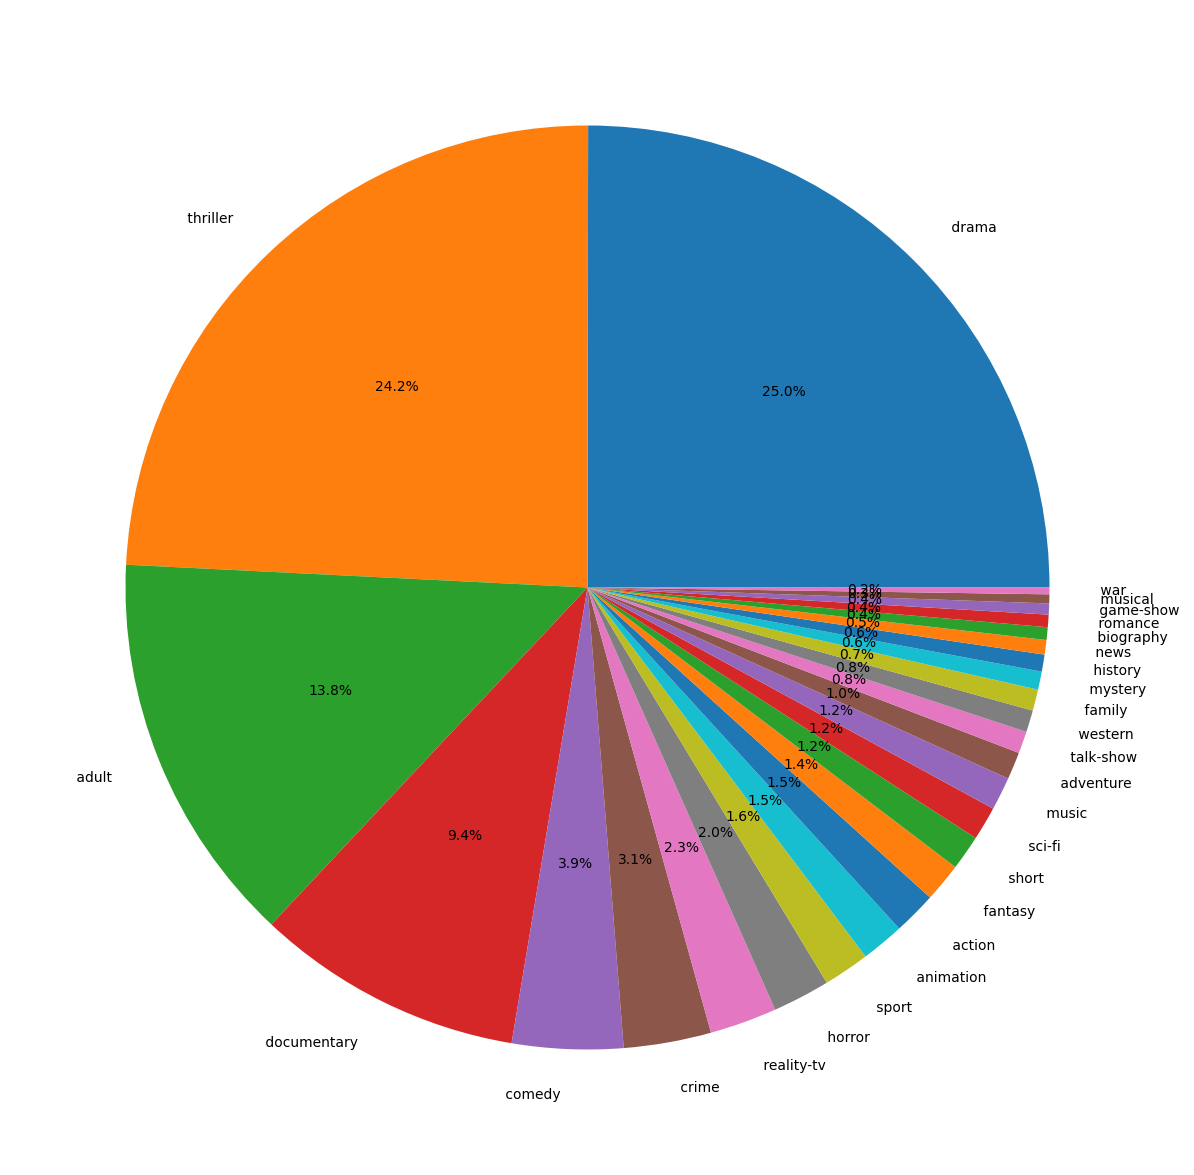

In [11]:
plt.figure(figsize=(15,15))
plt.pie(df['Gener'].value_counts(),labels=[' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '],autopct='%0.1f%%')


<div style="background-color: #A1C6E7; border: 5px solid #000000; border-radius: 20px; padding: 20px; position: relative; overflow: hidden; box-shadow: 0px 4px 8px rgba(0,0,0,0.3);">
  <h1 style="color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
    Remove Punctuation
  </h1>
  <div style="position: absolute; top: -10px; left: -10px; right: -10px; bottom: -10px; border: 5px solid #000000; border-radius: 20px; transform: rotate(-2deg); pointer-events: none;"></div>
</div>

In [12]:
def remove_punct(text):
    import string as st
    punct=st.punctuation
    new_text=''.join([char for char in text if char not in punct])
    return new_text

df['Description']=df['Description'].apply(lambda x:remove_punct(x))

In [13]:
df.tail()

,Movie_name,Gener,Description
13996,Bridging the Gap: A Middle East Comedy Confer...,comedy,Hosted by Ahmed Ahmed and Avi Liberman Bridgi...
13997,Nieuw tiengemeten (2010),documentary,New Tiengemeten is the account of the transfo...
13998,That's What She Told Me (2011),short,A New York Artist accidentally summons the Gh...
13999,All Things Bakelite: The Age of Plastic (2016),documentary,All Things Bakelite a film by John Maher is a...
14000,Hanna D. - La ragazza del Vondel Park (1984),drama,Hanna is a girl completely abandoned to herse...


<div style="background-color: #A1C6E7; border: 5px solid #000000; border-radius: 20px; padding: 20px; position: relative; overflow: hidden; box-shadow: 0px 4px 8px rgba(0,0,0,0.3);">
  <h1 style="color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
    Text to lower Case
  </h1>
  <div style="position: absolute; top: -10px; left: -10px; right: -10px; bottom: -10px; border: 5px solid #000000; border-radius: 20px; transform: rotate(-2deg); pointer-events: none;"></div>
</div>


In [14]:
df['Description']=df['Description'].apply(lambda x:x.lower())
df.head()

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...
2,Cupid (1997),thriller,a brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...
4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,the films title refers not only to the unreco...



<div style="background-color: #A1C6E7; border: 5px solid #000000; border-radius: 20px; padding: 20px; position: relative; overflow: hidden; box-shadow: 0px 4px 8px rgba(0,0,0,0.3);">
  <h1 style="color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
    Toknizatoin
  </h1>
  <div style="position: absolute; top: -10px; left: -10px; right: -10px; bottom: -10px; border: 5px solid #000000; border-radius: 20px; transform: rotate(-2deg); pointer-events: none;"></div>
</div>


In [15]:
def toknize(text):
    from nltk.tokenize import word_tokenize
    new_text=word_tokenize(text)
    return new_text
df['Description']=df['Description'].apply(lambda x:toknize(x))

In [16]:
df.head(5)

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,"[listening, in, to, a, conversation, between, ..."
2,Cupid (1997),thriller,"[a, brother, and, sister, with, a, past, inces..."
3,"Young, Wild and Wonderful (1980)",adult,"[as, the, bus, empties, the, students, for, th..."
4,The Secret Sin (1915),drama,"[to, help, their, unemployed, father, make, en..."
5,The Unrecovered (2007),drama,"[the, films, title, refers, not, only, to, the..."


<div style="background-color: #A1C6E7; border: 5px solid #000000; border-radius: 20px; padding: 20px; position: relative; overflow: hidden; box-shadow: 0px 4px 8px rgba(0,0,0,0.3);">
  <h1 style="color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
    stemming
  </h1>
  <div style="position: absolute; top: -10px; left: -10px; right: -10px; bottom: -10px; border: 5px solid #000000; border-radius: 20px; transform: rotate(-2deg); pointer-events: none;"></div>
</div>


In [17]:
def stemming(text):
    from nltk import PorterStemmer
    ps=PorterStemmer().stem
    # dir(PorterStemmer())
    new_text=" ".join([ps(word) for word in text ]) 
    return new_text
df['Description']=df['Description'].apply(lambda x : stemming(x))

In [18]:
df.head(5) 

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,listen in to a convers between hi doctor and p...
2,Cupid (1997),thriller,a brother and sister with a past incestu relat...
3,"Young, Wild and Wonderful (1980)",adult,as the bu empti the student for their field tr...
4,The Secret Sin (1915),drama,to help their unemploy father make end meet ed...
5,The Unrecovered (2007),drama,the film titl refer not onli to the unrecov bo...


<div style="background-color: #A1C6E7; border: 5px solid #000000; border-radius: 20px; padding: 20px; position: relative; overflow: hidden; box-shadow: 0px 4px 8px rgba(0,0,0,0.3);">
  <h1 style="color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
    Vectorization useing TF-IDF

  </h1>
  <div style="position: absolute; top: -10px; left: -10px; right: -10px; bottom: -10px; border: 5px solid #000000; border-radius: 20px; transform: rotate(-2deg); pointer-events: none;"></div>
</div>


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf=TfidfVectorizer()

Description_tf_idf=tf_idf.fit_transform(df['Description'])

print(Description_tf_idf.shape)

Description_tf_idf=pd.DataFrame(Description_tf_idf.toarray())
Description_tf_idf.columns = tf_idf.get_feature_names_out()

Description_tf_idf 

(14000, 50500)


,00,000,000km,003,007,01,02,03,04,040404,...,ťcoquetti,ťel,ťgoe,ťkleineť,ťrare,ťthe,ťŕ,żestán,żo,żte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div style="background-color: #A1C6E7; border: 5px solid #000000; border-radius: 20px; padding: 20px; position: relative; overflow: hidden; box-shadow: 0px 4px 8px rgba(0,0,0,0.3);">
  <h1 style="color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
     Feature Engineering


  </h1>
  <div style="position: absolute; top: -10px; left: -10px; right: -10px; bottom: -10px; border: 5px solid #000000; border-radius: 20px; transform: rotate(-2deg); pointer-events: none;"></div>
</div>


In [20]:
df['Description len']=df['Description'].apply(lambda x:len(x)-x.count(' '))
df.head(10)

,Movie_name,Gener,Description,Description len
1,Oscar et la dame rose (2009),drama,listen in to a convers between hi doctor and p...,390
2,Cupid (1997),thriller,a brother and sister with a past incestu relat...,142
3,"Young, Wild and Wonderful (1980)",adult,as the bu empti the student for their field tr...,457
4,The Secret Sin (1915),drama,to help their unemploy father make end meet ed...,794
5,The Unrecovered (2007),drama,the film titl refer not onli to the unrecov bo...,451
6,Quality Control (2011),documentary,qualiti control consist of a seri of 16mm sing...,1149
7,"""Pink Slip"" (2009)",comedy,in tough econom time max and joey have all but...,240
8,One Step Away (1985),crime,ron petri keanu reev is a troubl teen whose li...,225
9,"""Desperate Hours"" (2016)",reality-tv,a sudden calamit event caus great loss of life...,328
10,Spirits (2014/I),horror,four high school student embark on a terrifi j...,322


<div style="background-color: #A1C6E7; border: 5px solid #000000; border-radius: 20px; padding: 20px; position: relative; overflow: hidden; box-shadow: 0px 4px 8px rgba(0,0,0,0.3);">
  <h1 style="color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
     Rescaling & split the data
  </h1>
  <div style="position: absolute; top: -10px; left: -10px; right: -10px; bottom: -10px; border: 5px solid #000000; border-radius: 20px; transform: rotate(-2deg); pointer-events: none;"></div>
</div>


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Description_len_sclr'] = scaler.fit_transform(df['Description len'].values.reshape(-1, 1))
df.head(5) 

,Movie_name,Gener,Description,Description len,Description_len_sclr
1,Oscar et la dame rose (2009),drama,listen in to a convers between hi doctor and p...,390,0.047919
2,Cupid (1997),thriller,a brother and sister with a past incestu relat...,142,0.014631
3,"Young, Wild and Wonderful (1980)",adult,as the bu empti the student for their field tr...,457,0.056913
4,The Secret Sin (1915),drama,to help their unemploy father make end meet ed...,794,0.102148
5,The Unrecovered (2007),drama,the film titl refer not onli to the unrecov bo...,451,0.056107


In [22]:
target=df['Gener']
feature=df.drop(['Gener','Movie_name','Description','Description len'],axis=1)


In [23]:
target

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
13996          comedy 
13997     documentary 
13998           short 
13999     documentary 
14000           drama 
Name: Gener, Length: 14000, dtype: object

In [24]:
feature

,Description_len_sclr
1,0.047919
2,0.014631
3,0.056913
4,0.102148
5,0.056107
...,...
13996,0.024698
13997,0.044564
13998,0.074362
13999,0.041477


In [25]:
target.shape , feature.shape

((14000,), (14000, 1))

In [26]:
Description_tf_idf.head()

,00,000,000km,003,007,01,02,03,04,040404,...,ťcoquetti,ťel,ťgoe,ťkleineť,ťrare,ťthe,ťŕ,żestán,żo,żte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
print(feature.shape)
print(Description_tf_idf.shape)


(14000, 1)
(14000, 50500)


In [28]:
feature.reset_index(drop=True, inplace=True)
Description_tf_idf.reset_index(drop=True, inplace=True)
feature = pd.concat([feature, pd.DataFrame(Description_tf_idf)], axis=1)


In [29]:
feature.shape

(14000, 50501)

In [30]:
feature.head()

,Description_len_sclr,00,000,000km,003,007,01,02,03,04,...,ťcoquetti,ťel,ťgoe,ťkleineť,ťrare,ťthe,ťŕ,żestán,żo,żte
0,0.047919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.014631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.056913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.102148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.056107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature,target,test_size=0.2)

In [32]:
print('x_train:',x_train.shape,'x_test:',x_test.shape,'y_train:',y_train.shape,'y_test:',y_test.shape)
   

x_train: (11200, 50501) x_test: (2800, 50501) y_train: (11200,) y_test: (2800,)


<div style="background-color: #A1C6E7; border: 5px solid #000000; border-radius: 20px; padding: 20px; position: relative; overflow: hidden; box-shadow: 0px 4px 8px rgba(0,0,0,0.3);">
  <h1 style="color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
      Train & Evaluate the Model
  </h1>
  <div style="position: absolute; top: -10px; left: -10px; right: -10px; bottom: -10px; border: 5px solid #000000; border-radius: 20px; transform: rotate(-2deg); pointer-events: none;"></div>
</div>


In [67]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

In [68]:
model=RandomForestClassifier(n_estimators=150,max_depth=50)

In [69]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=50, n_estimators=150)

In [70]:
model.score(x_train,y_train)

0.9582142857142857

In [39]:
# k_fold = KFold(n_splits=5)
# cross_val_score(model,feature,target, cv=k_fold, scoring='accuracy', n_jobs=-1)

In [79]:
from joblib import dump

dump(model, 'Random_forest_model.joblib')


['Random_forest_model.joblib']